In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor as KNN
%matplotlib inline

import pandas as pd
import numpy as np
import os, random
import sklearn
print sklearn.__version__

0.18.1


In [2]:
def GetPandasFromFileCSV(path):
    return pd.read_csv(path, delimiter=',')

def GetPandasFromFile(path, theSkipRow):
    return pd.read_csv(path, skiprows= theSkipRow , header=None)

In [3]:
df = GetPandasFromFileCSV("[dataFinal]/_RentPriceTruliaMergeFinal.csv")
print df.shape
print df.head(3)
print df.columns.values

(13049, 47)
   pixelPlant  pixelPole  pixelLake  pixelRoad  pixelGrass  pixelWall  \
0         0.0      0.000      60.99      2.671         0.0      2.116   
1         0.0      0.004      34.12      0.217         0.0      4.409   
2         0.0      0.000       0.00      0.000         0.0      0.000   

   pixelCar  propertiesAsses  pixelSea  numCraigslistHouse   ...    pixelSky  \
0     6.639        142585895       0.0                   0   ...       18.16   
1    22.560        173725104       0.0                   0   ...       27.81   
2     0.000        243090896       0.0                   0   ...        0.00   

    Latitude  Longitude                          Address   Zip  RoomType  \
0  42.358550 -71.064780  37 Mount Vernon #4 Boston 02108  2108         3   
1  42.356533 -71.070305          3 Byron St Boston 02108  2108         3   
2  42.355400 -71.061510         3 Winter Pl Boston 02108  2108         2   

   Bathrooms  SQFT         SQM   Price  
0        2.0  1425  132.3867

In [4]:
for col in df.columns:
    print col,len(df[df[col].isnull()])

pixelPlant 0
pixelPole 0
pixelLake 0
pixelRoad 0
pixelGrass 0
pixelWall 0
pixelCar 0
propertiesAsses 0
pixelSea 0
numCraigslistHouse 0
pixelRiver 0
pixelBus 0
pixelCeiling 0
pixelPath 0
pixelBuilding 0
crime 0
pixelFence 0
walkSchool 0
walkMbta 0
energySiteEUI 0
pixelPerson 0
pixelTree 0
pixelVan 0
walkPark 0
walkUniversity 0
pixelSidewalk 0
pixelGround 0
pixelMountain 0
pixelPalmTree 0
pixelHouse 0
pixelBridge 0
pixelSign 0
pixelRailing 0
pixelField 0
pixelWindow 0
pixelGrandstand 0
numCraigslistRoom 0
pixelSky 0
Latitude 0
Longitude 0
Address 0
Zip 0
RoomType 995
Bathrooms 125
SQFT 8630
SQM 0
Price 27


In [5]:
data = df.convert_objects(convert_numeric=True)

to_float = []
to_encode = []
for col in data.columns:
    if data[col].dtype =='object':
        to_encode.append(col);
    if data[col].dtype =='int64':
        to_float.append(col);
    print col,data[col].dtype
        
print to_float
print "----------------------"
print to_encode

for feature_name in to_float:
    data[feature_name] = data[feature_name].astype(float)

def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Categorical columns for use in one-hot encoder
categorical = (data.dtypes.values != np.dtype('float64'))

# Encode all labels
data = data.apply(encode_categorical)

pixelPlant float64
pixelPole float64
pixelLake float64
pixelRoad float64
pixelGrass float64
pixelWall float64
pixelCar float64
propertiesAsses int64
pixelSea float64
numCraigslistHouse int64
pixelRiver float64
pixelBus float64
pixelCeiling float64
pixelPath float64
pixelBuilding float64
crime int64
pixelFence int64
walkSchool int64
walkMbta int64
energySiteEUI float64
pixelPerson float64
pixelTree float64
pixelVan float64
walkPark int64
walkUniversity int64
pixelSidewalk float64
pixelGround float64
pixelMountain float64
pixelPalmTree float64
pixelHouse float64
pixelBridge float64
pixelSign float64
pixelRailing float64
pixelField float64
pixelWindow float64
pixelGrandstand float64
numCraigslistRoom int64
pixelSky float64
Latitude float64
Longitude float64
Address object
Zip int64
RoomType float64
Bathrooms float64
SQFT float64
SQM float64
Price float64
['propertiesAsses', 'numCraigslistHouse', 'crime', 'pixelFence', 'walkSchool', 'walkMbta', 'walkPark', 'walkUniversity', 'numCraigslistR

C:\Users\EllieHan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [6]:
data.head()

,pixelPlant,pixelPole,pixelLake,pixelRoad,pixelGrass,pixelWall,pixelCar,propertiesAsses,pixelSea,numCraigslistHouse,...,pixelSky,Latitude,Longitude,Address,Zip,RoomType,Bathrooms,SQFT,SQM,Price
0,0.0,0.000,60.99,2.671,0.0,2.116,6.639,142585895.0,0.0,0.0,...,18.16,42.358550,-71.064780,4755,2108.0,3.0,2.0,1425.0,132.386775,4250.0
1,0.0,0.004,34.12,0.217,0.0,4.409,22.560,173725104.0,0.0,0.0,...,27.81,42.356533,-71.070305,4058,2108.0,3.0,3.5,2500.0,232.257500,9500.0
2,0.0,0.000,0.00,0.000,0.0,0.000,0.000,243090896.0,0.0,0.0,...,0.00,42.355400,-71.061510,4096,2108.0,2.0,2.5,2250.0,209.031750,8500.0
3,0.0,0.000,37.65,1.242,0.0,0.694,0.020,216929815.0,0.0,0.0,...,24.04,42.356464,-71.061760,6249,2108.0,4.0,2.0,1325.0,123.096475,7200.0
4,0.0,0.000,37.65,1.242,0.0,0.694,0.020,216929815.0,0.0,0.0,...,24.04,42.356464,-71.061760,6242,2108.0,2.0,1.0,750.0,69.677250,3800.0


In [7]:
data.dropna(axis=0,subset=['RoomType','Price','Bathrooms'],inplace=True)
data.shape

(11569, 47)

In [8]:
k=4
knntest = data[data['SQFT'].isnull()]
knntrain = data[data['SQFT'].isnull()==False]

xknn_train = knntrain[['RoomType','Bathrooms','Longitude','Latitude','Zip']].values
yknn_train = knntrain['SQFT'].values

xknn_test = knntest[['RoomType','Bathrooms','Longitude','Latitude','Zip']].values
neighbours = KNN(n_neighbors=k)
neighbours.fit(xknn_train, yknn_train)
yknn_test = neighbours.predict(xknn_test)

data.set_value( data['SQFT'].isnull(),'SQFT',yknn_test)

print data.columns.values


['pixelPlant' 'pixelPole' 'pixelLake' 'pixelRoad' 'pixelGrass' 'pixelWall'
 'pixelCar' 'propertiesAsses' 'pixelSea' 'numCraigslistHouse' 'pixelRiver'
 'pixelBus' 'pixelCeiling' 'pixelPath' 'pixelBuilding' 'crime' 'pixelFence'
 'walkSchool' 'walkMbta' 'energySiteEUI' 'pixelPerson' 'pixelTree'
 'pixelVan' 'walkPark' 'walkUniversity' 'pixelSidewalk' 'pixelGround'
 'pixelMountain' 'pixelPalmTree' 'pixelHouse' 'pixelBridge' 'pixelSign'
 'pixelRailing' 'pixelField' 'pixelWindow' 'pixelGrandstand'
 'numCraigslistRoom' 'pixelSky' 'Latitude' 'Longitude' 'Address' 'Zip'
 'RoomType' 'Bathrooms' 'SQFT' 'SQM' 'Price']


In [10]:
data.shape

(11569, 47)

In [11]:
data.head()

,pixelPlant,pixelPole,pixelLake,pixelRoad,pixelGrass,pixelWall,pixelCar,propertiesAsses,pixelSea,numCraigslistHouse,...,pixelSky,Latitude,Longitude,Address,Zip,RoomType,Bathrooms,SQFT,SQM,Price
0,0.0,0.000,60.99,2.671,0.0,2.116,6.639,142585895.0,0.0,0.0,...,18.16,42.358550,-71.064780,4755,2108.0,3.0,2.0,1425.0,132.386775,4250.0
1,0.0,0.004,34.12,0.217,0.0,4.409,22.560,173725104.0,0.0,0.0,...,27.81,42.356533,-71.070305,4058,2108.0,3.0,3.5,2500.0,232.257500,9500.0
2,0.0,0.000,0.00,0.000,0.0,0.000,0.000,243090896.0,0.0,0.0,...,0.00,42.355400,-71.061510,4096,2108.0,2.0,2.5,2250.0,209.031750,8500.0
3,0.0,0.000,37.65,1.242,0.0,0.694,0.020,216929815.0,0.0,0.0,...,24.04,42.356464,-71.061760,6249,2108.0,4.0,2.0,1325.0,123.096475,7200.0
4,0.0,0.000,37.65,1.242,0.0,0.694,0.020,216929815.0,0.0,0.0,...,24.04,42.356464,-71.061760,6242,2108.0,2.0,1.0,750.0,69.677250,3800.0


In [13]:
data["PricePerSQM"] = data["Price"]/(data["SQFT"]*0.09290304)
data["PricePerSQM"].describe()

count    11569.000000
mean        29.440228
std         25.720273
min          1.399448
25%         21.961267
50%         27.621903
75%         34.795494
max       2454.311821
Name: PricePerSQM, dtype: float64

In [14]:
data.columns.values

array(['pixelPlant', 'pixelPole', 'pixelLake', 'pixelRoad', 'pixelGrass',
       'pixelWall', 'pixelCar', 'propertiesAsses', 'pixelSea',
       'numCraigslistHouse', 'pixelRiver', 'pixelBus', 'pixelCeiling',
       'pixelPath', 'pixelBuilding', 'crime', 'pixelFence', 'walkSchool',
       'walkMbta', 'energySiteEUI', 'pixelPerson', 'pixelTree', 'pixelVan',
       'walkPark', 'walkUniversity', 'pixelSidewalk', 'pixelGround',
       'pixelMountain', 'pixelPalmTree', 'pixelHouse', 'pixelBridge',
       'pixelSign', 'pixelRailing', 'pixelField', 'pixelWindow',
       'pixelGrandstand', 'numCraigslistRoom', 'pixelSky', 'Latitude',
       'Longitude', 'Address', 'Zip', 'RoomType', 'Bathrooms', 'SQFT',
       'SQM', 'Price', 'PricePerSQM'], dtype=object)

In [15]:
data = data.drop('Address',1)
data = data.drop('Price',1)
data['pixelSea'] = data['pixelRiver']+data['pixelLake']+data['pixelSea']
data.rename(columns={'pixelRiver':'pixelWater'}, inplace=True)
data = data.drop('pixelLake',1)
data = data.drop('pixelSea',1)
data = data.drop('SQFT',1)
data = data.drop('SQM',1)

In [16]:
data.head()
datacon=data

In [17]:
data = data[(data['PricePerSQM']>150) == False]
y_new = data["PricePerSQM"]
y = data["PricePerSQM"].values
data = data.drop("PricePerSQM",1)
data = data.drop('pixelFence',1)
x = data.values
print y

[ 32.10289072  40.90285958  40.66366157 ...,  16.55986218  16.9224869
  18.83684323]


40


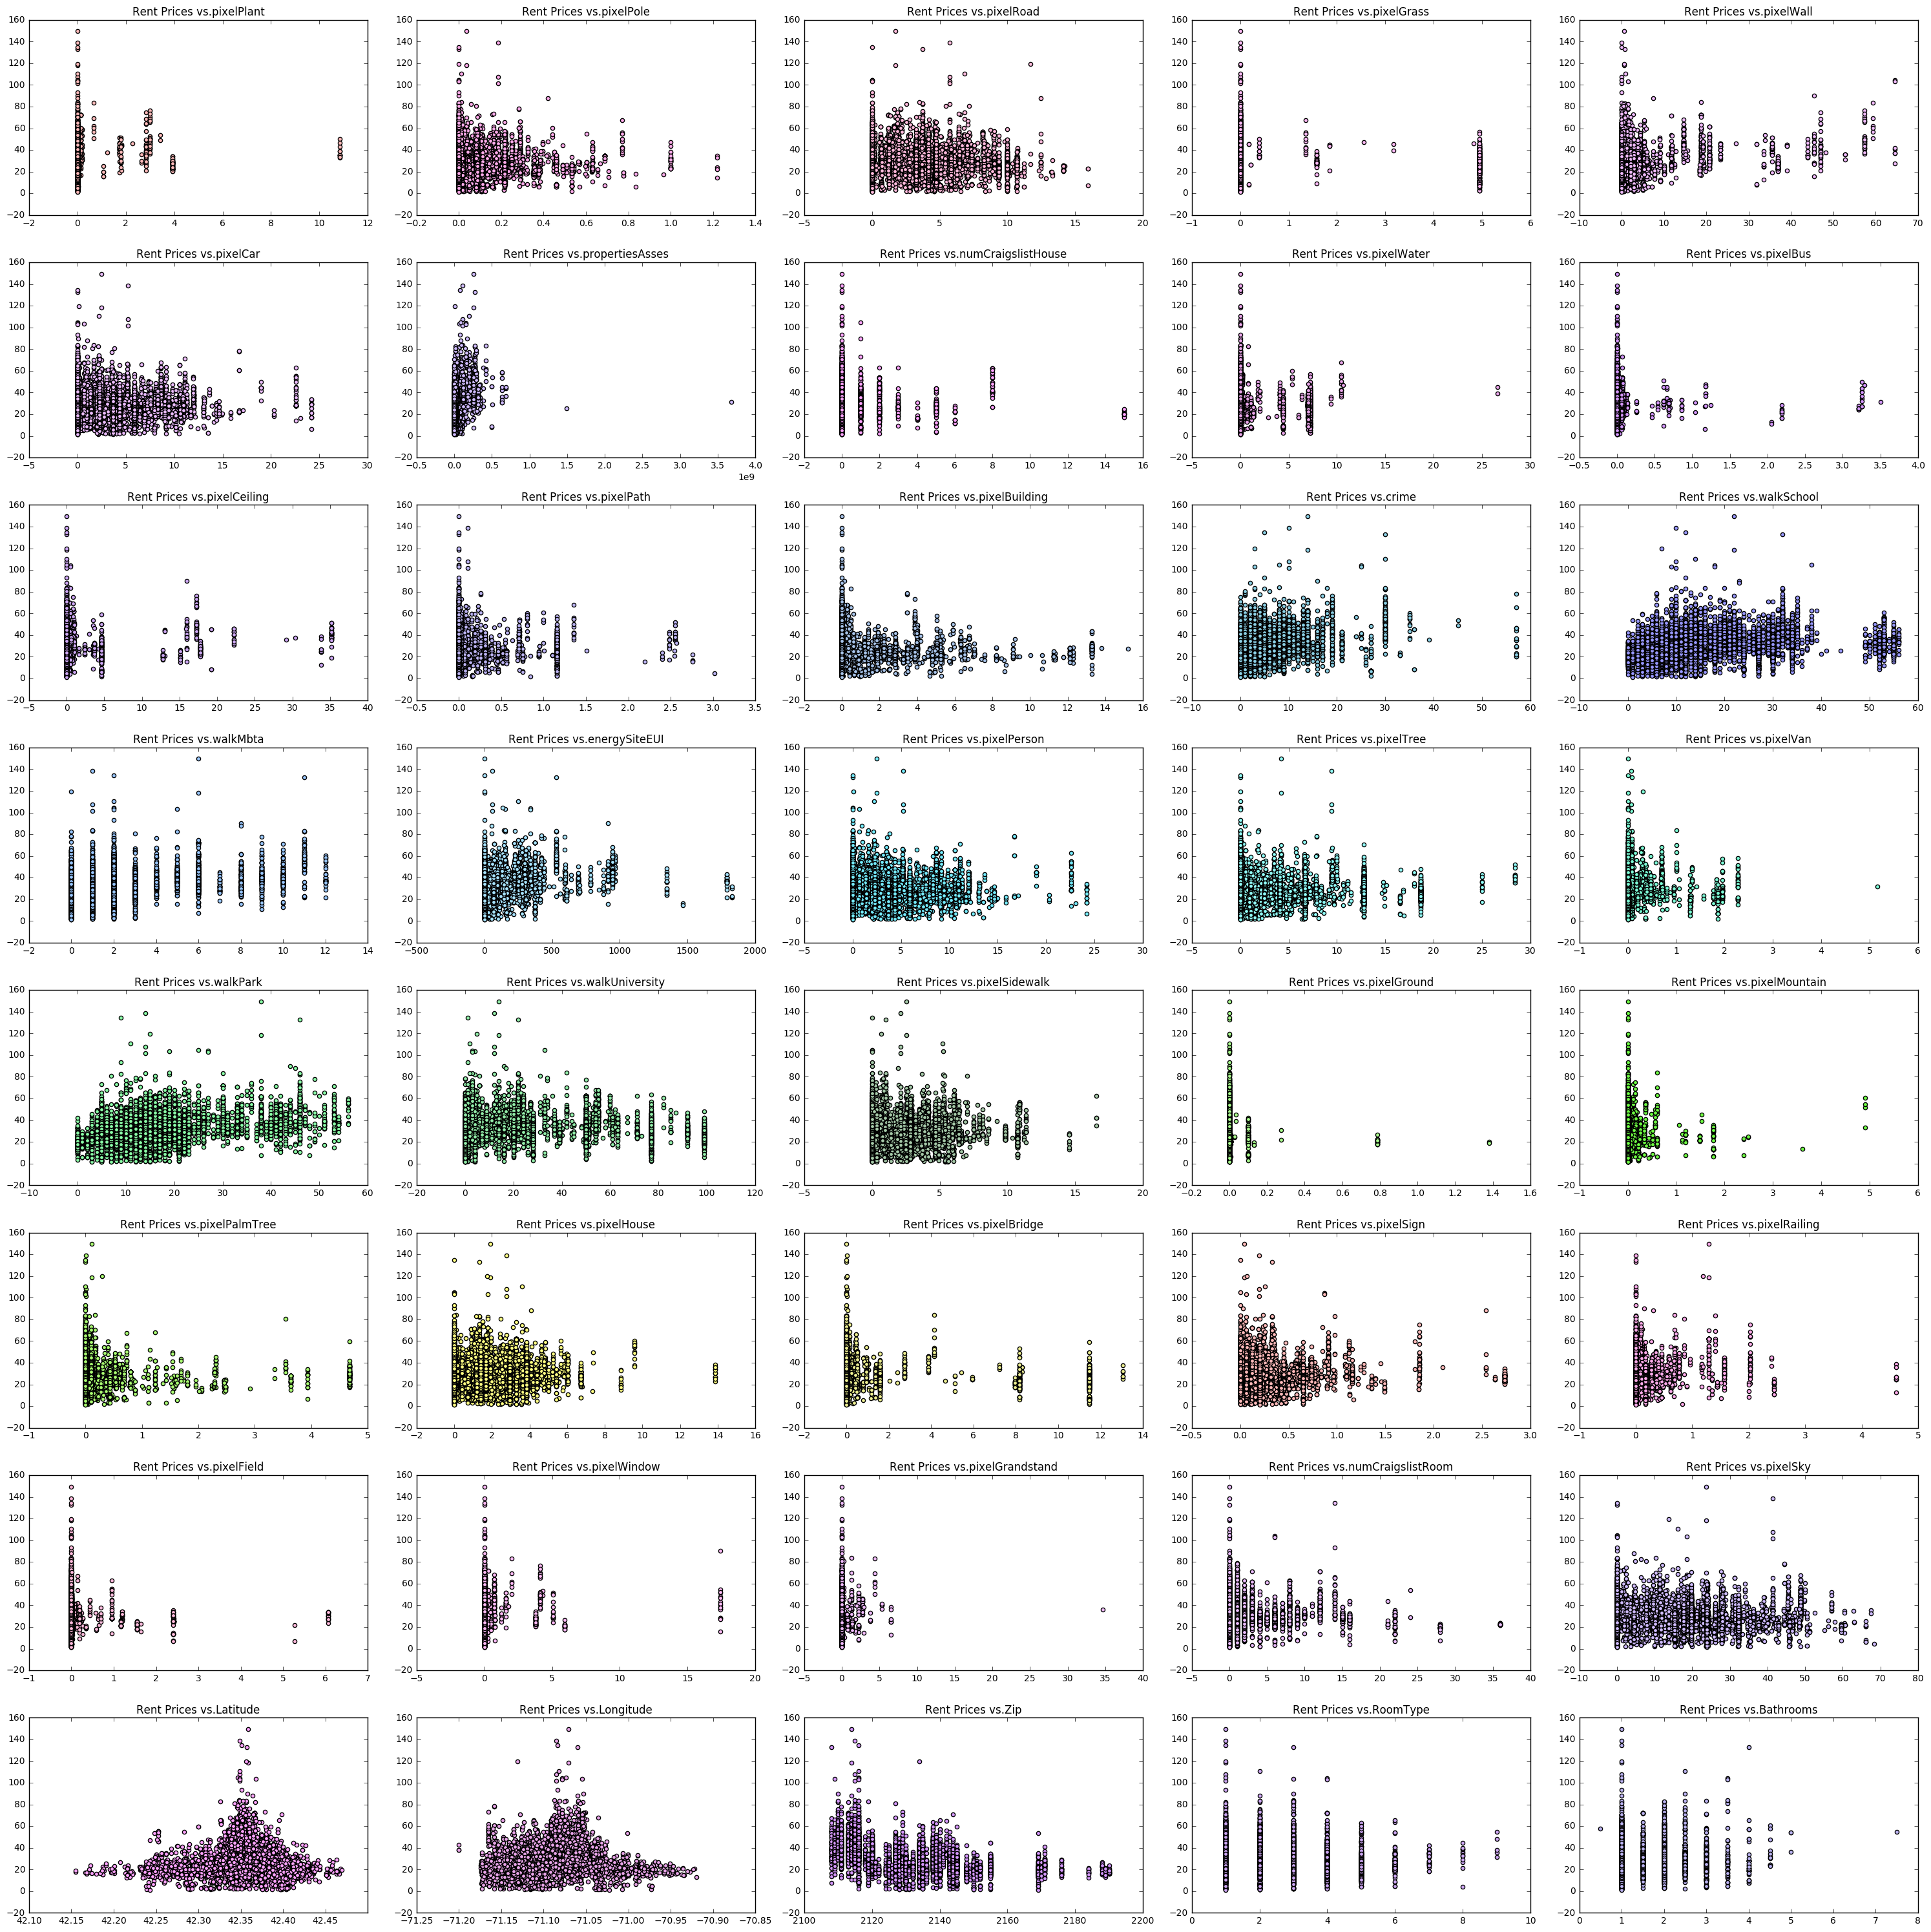

In [18]:
print len(data.columns)

theRow = 5
theCol = 8

cmaps = ["#FFBBBB","#FFACEC","#FFBBDD","#FFBBF7","#F2BCFE","#EDBEFE","#D0BCFE", "#FFA4FF", "#EAA6EA",
    "#D698FE", "#CEA8F4", "#BCB4F3","#A9C5EB","#8CD1E6","#9999FF","#99C7FF","#A8E4FF","#75ECFD","#92FEF9","#7DFDD7","#8BFEA8","#93EEAA",
"#A6CAA9","#AAFD8E","#6FFF44","#ABFF73","#FFFF84","#EEF093"]
fig,ax = plt.subplots(theCol,theRow,figsize=(30,30))

count = 0;
countColor = 0;
for j in range(theCol):
    for i in range(theRow):
        if(countColor == len(cmaps)): countColor =0
        
#         ax[j,i].scatter(data[data.columns[i]],y)for i in range(theRow):

#         fig,ax = plt.subplots(1,1,figsize=(6,6))
        ax[j,i].scatter(data[data.columns[count]],y, c=cmaps[countColor])
        ax[j,i].set_title('Rent Prices vs.'+data.columns[count])
#         plt.save
        ax[j,i].set_title('Rent Prices vs.'+data.columns[count])
        count+=1
        countColor+=1
fig.tight_layout()    
fig.savefig("pic", transparent = True)


C:\Users\EllieHan\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


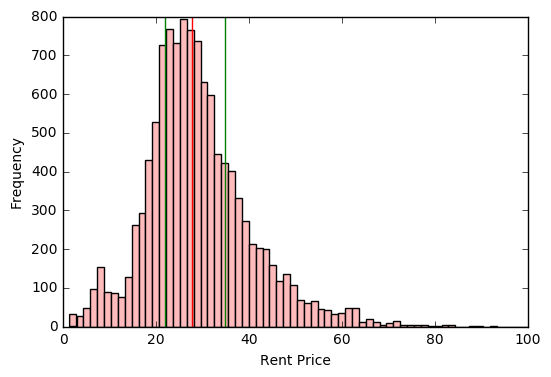

[ 32.10289072  40.90285958  40.66366157 ...,  16.55986218  16.9224869
  18.83684323]
(11564, 3)
(2888, 3)
(5784, 3)
(2892, 3)


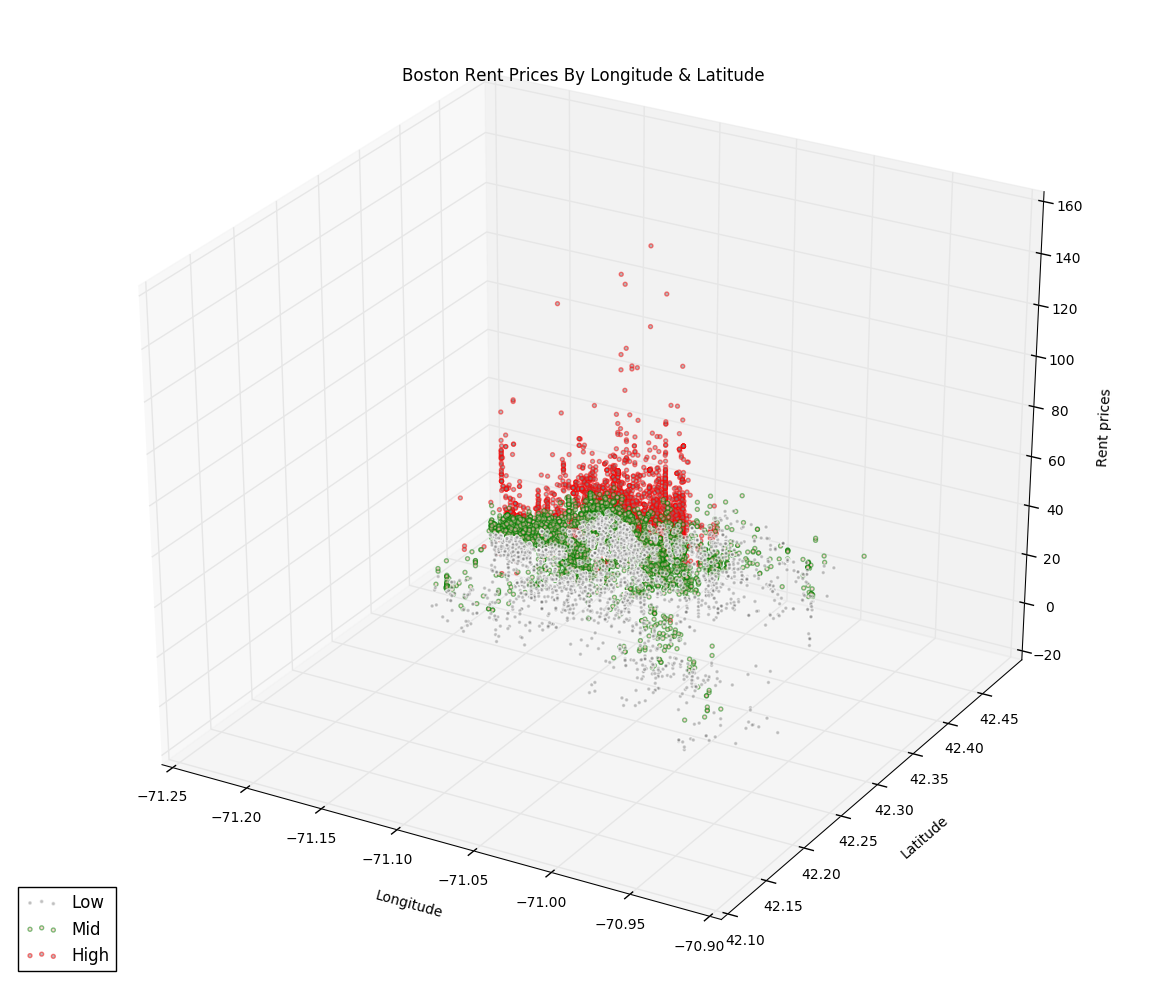

In [19]:
# 25%         21.961267
# 50%         27.621903
# 75%         34.795494

plt.hist(y,bins = 100,color="#FFBBBB")
plt.axvline(21.96,c="green")
plt.axvline(27.62,c="red")
plt.axvline(34.79,c="green")
plt.xlabel("Rent Price")
plt.ylabel("Frequency")
plt.xlim(0, 100)
plt.legend()
plt.show()


from mpl_toolkits.mplot3d import Axes3D

import matplotlib.cm as cmx
import matplotlib.colors as colors
# plotting boston data
fig = plt.figure(figsize=(35,10))

#Project onto axes: 1, 2, 3
ax1 = fig.add_subplot(1, 3, 1,  projection='3d')
print y

newData = pd.DataFrame()
newData['Longitude'] = data['Longitude']
newData['Latitude'] = data['Latitude']
newData['y'] = y
print newData.shape
newData1 = newData[newData['y']<21.96]
newData2 = newData[(newData['y']>21.96 )&(newData['y']<34.79)]
newData3 = newData[34.79<newData['y']]


print newData1.shape
print newData2.shape
print newData3.shape

ax1.scatter(newData1['Longitude'], newData1['Latitude'],newData1['y'], label='Low' , facecolors = "gray",edgecolors = "white",alpha = 0.5, s=8)
ax1.scatter(newData2['Longitude'], newData2['Latitude'],newData2['y'], label='Mid' , facecolors = "#FFBBBB",edgecolors = "green",alpha = 0.5, s=8)
ax1.scatter(newData3['Longitude'], newData3['Latitude'],newData3['y'], label='High' , facecolors = "gray",edgecolors = "red",alpha = 0.5, s=8)


    # Y = [(2 if y >= 40 else (1 if 20<y<40  else 0)) for y in Y]
ax1.set_xlabel('\n'+'\n' + 'Longitude')
ax1.set_ylabel('\n'+'\n' +'Latitude')
ax1.set_zlabel('\n'+'\n' +'Rent prices')
ax1.set_title('Boston Rent Prices By Longitude & Latitude')
ax1.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [20]:
print data.shape
data.columns.values

(11564, 40)


array(['pixelPlant', 'pixelPole', 'pixelRoad', 'pixelGrass', 'pixelWall',
       'pixelCar', 'propertiesAsses', 'numCraigslistHouse', 'pixelWater',
       'pixelBus', 'pixelCeiling', 'pixelPath', 'pixelBuilding', 'crime',
       'walkSchool', 'walkMbta', 'energySiteEUI', 'pixelPerson',
       'pixelTree', 'pixelVan', 'walkPark', 'walkUniversity',
       'pixelSidewalk', 'pixelGround', 'pixelMountain', 'pixelPalmTree',
       'pixelHouse', 'pixelBridge', 'pixelSign', 'pixelRailing',
       'pixelField', 'pixelWindow', 'pixelGrandstand', 'numCraigslistRoom',
       'pixelSky', 'Latitude', 'Longitude', 'Zip', 'RoomType', 'Bathrooms'], dtype=object)

In [21]:
import json
import numpy as np
from statsmodels.regression.linear_model import OLS
import pandas as pd
import scipy as sp
from sklearn import preprocessing
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import itertools as it
%matplotlib inline
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.preprocessing import StandardScaler as Standardize

C:\Users\EllieHan\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
#base linear regression 
base=['Longitude', 'Latitude','Bathrooms','Zip','RoomType']

xlinear = data[base].values
n = xlinear.shape[0]
n_train = int(np.round(n * 0.5))

# First 40% train, remaining test
xlinear_train = xlinear[:n_train, :]
y_train = y[:n_train]
xlinear_test = xlinear[n_train:, :]
y_test = y[n_train:]
reg = Lin_Reg() #automatically fits intercept (adds column of one's) for you
reg.fit(xlinear_train, y_train)
ylinearpred = reg.predict(xlinear_test)
train_r_squared_plain = reg.score(xlinear_train, y_train)
test_r_squared_plain = reg.score(xlinear_test, y_test)

print 'Plain Regression: R^2 score on training set', train_r_squared_plain
print 'Plain Regression: R^2 score on test set', test_r_squared_plain
print reg.coef_

Plain Regression: R^2 score on training set 0.335073654303
Plain Regression: R^2 score on test set -2.09303867662
[ -76.33180909  134.4113976     0.83954563   -0.86976465   -1.40934513]


In [23]:
### Step-wise Forward Selection
d = x.shape[1] # total no. of predictors
# Keep track of current set of chosen predictors, and the remaining set of predictors
current_predictors = [] 
remaining_predictors = range(d)

# Set some initial large value for min BIC score for all possible subsets
global_min_bic = 1e10 

# Keep track of the best subset of predictors
best_subset = [] 

# Iterate over all possible subset sizes, 0 predictors to d predictors
for size in range(d):    
    max_r_squared = -1e10 # set some initial small value for max R^2
    best_predictor = -1 # set some throwaway initial number for the best predictor to add
    bic_with_best_predictor = 1e10 # set some initial large value for BIC score   
        
    # Iterate over all remaining predictors to find best predictor to add
    for i in remaining_predictors:
        # Make copy of current set of predictors
        temp = current_predictors[:]
        # Add predictor 'i'
        temp.append(i)
                                    
        # Use only a subset of predictors in the training data
        x_subset = x[:, temp]
        # Add a column of ones
        x_subset = np.hstack((x_subset, np.ones((x_subset.shape[0], 1))))
        
        # Fit and evaluate R^2
        model = OLS(y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        
        # Check if we get a higher R^2 value than than current max R^2, if so, update
        if(r_squared > max_r_squared):
            max_r_squared = r_squared
            best_predictor = i
            bic_with_best_predictor = results.bic
    
    # Remove best predictor from remaining list, and add best predictor to current list
    remaining_predictors.remove(best_predictor)
    current_predictors.append(best_predictor)
    
    # Check if BIC for with the predictor we just added is lower than 
    # the global minimum across all subset of predictors
    if(bic_with_best_predictor < global_min_bic):
        best_subset = current_predictors[:]
        global_min_bic = bic_with_best_predictor
    
print 'Step-wise forward subset selection:'
print sorted(best_subset) # add 1 as indices start from 0
forward = data.columns.values[sorted(best_subset)]
print forward

Step-wise forward subset selection:
[4, 6, 8, 9, 10, 12, 13, 14, 15, 20, 21, 27, 30, 34, 36, 37, 38, 39]
['pixelWall' 'propertiesAsses' 'pixelWater' 'pixelBus' 'pixelCeiling'
 'pixelBuilding' 'crime' 'walkSchool' 'walkMbta' 'walkPark'
 'walkUniversity' 'pixelBridge' 'pixelField' 'pixelSky' 'Longitude' 'Zip'
 'RoomType' 'Bathrooms']


In [24]:
###  Step-wise Backward Selection
d = x.shape[1] # total no. of predictors
# Keep track of current set of chosen predictors
current_predictors = range(d)

# First, fit and evaluate BIC using all 'd' number of predictors
model = OLS(y, x)
results = model.fit()
bic_all = results.bic

# Set the minimum BIC score, initially, to the BIC score using all 'd' predictors
global_min_bic = bic_all
# Keep track of the best subset of predictors
best_subset = [] 

# Iterate over all possible subset sizes, d predictors to 1 predictor
for size in range(d - 1, 0, -1): # stop before 0 to avoid choosing an empty set of predictors
    max_r_squared = -1e10 # set some initial small value for max R^2
    worst_predictor = -1 # set some throwaway initial number for the worst predictor to remove
    bic_without_worst_predictor = 1e10 # set some initial large value for min BIC score  
        
    # Iterate over current set of predictors (for potential elimination)
    for i in current_predictors:
        # Create copy of current predictors, and remove predictor 'i'
        temp = current_predictors[:]
        temp.remove(i)
                                    
        # Use only a subset of predictors in the training data
        x_subset = x[:, temp]
        # Add a column of ones
        x_subset = np.hstack((x_subset, np.ones((x_subset.shape[0], 1))))
        
        # Fit and evaluate R^2
        model = OLS(y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        
        # Check if we get a higher R^2 value than than current max R^2, if so, update
        if(r_squared > max_r_squared):
            max_r_squared = r_squared
            worst_predictor = i
            bic_without_worst_predictor = results.bic
          
    # Remove worst predictor from current set of predictors
    current_predictors.remove(worst_predictor)
    
    # Check if BIC for the predictor we just removed is lower than 
    # the global minimum across all subset of predictors
    if(bic_without_worst_predictor < global_min_bic):
        best_subset = current_predictors[:]
        global_min_bic = bic_without_worst_predictor
    
print 'Step-wise backward subset selection:'
print sorted(best_subset)
backward = data.columns.values[sorted(best_subset)]
print backward

Step-wise backward subset selection:
[4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 20, 21, 27, 30, 36, 37, 38, 39]
['pixelWall' 'pixelCar' 'propertiesAsses' 'pixelWater' 'pixelBus'
 'pixelCeiling' 'pixelBuilding' 'crime' 'walkSchool' 'walkMbta' 'walkPark'
 'walkUniversity' 'pixelBridge' 'pixelField' 'Longitude' 'Zip' 'RoomType'
 'Bathrooms']


## With forward and backward feature selections, number of crime, distance to school, bathrooms numbers, and square feet areas are the releveant features 



In [25]:
from sklearn.cross_validation import train_test_split

Baseline = ['Longitude', 'Latitude','Bathrooms','Zip','RoomType']

Socio = ['crime', 'walkSchool', 'walkMbta', 'walkPark' ,
'walkUniversity','numCraigslistRoom','numCraigslistHouse','propertiesAsses']

Socio_add = ['crime', 'walkSchool', 'walkMbta', 'walkPark' ,
'walkUniversity','numCraigslistRoom','numCraigslistHouse','propertiesAsses','Longitude', 'Latitude','Bathrooms','Zip','RoomType']

Viz = ['pixelWall','pixelWater' ,'pixelBus', 'pixelCeiling', 'pixelBuilding',
'pixelBridge', 'pixelField' ,'pixelSky']

Viz_add = ['pixelWall','pixelWater' ,'pixelBus', 'pixelCeiling', 'pixelBuilding',
'pixelBridge', 'pixelField' ,'pixelSky','Longitude', 'Latitude','Bathrooms','Zip','RoomType']

Socio_viz = ['crime', 'walkSchool', 'walkMbta', 'walkPark' ,
'walkUniversity','numCraigslistRoom','numCraigslistHouse','propertiesAsses','pixelWall','pixelWater' ,'pixelBus', 'pixelCeiling', 'pixelBuilding',
'pixelBridge', 'pixelField' ,'pixelSky']

Total = ['Longitude', 'Latitude','Bathrooms','Zip','RoomType','crime', 'walkSchool', 'walkMbta', 'walkPark' ,
'walkUniversity','numCraigslistRoom','numCraigslistHouse','propertiesAsses','pixelWall','pixelWater' ,'pixelBus', 'pixelCeiling', 'pixelBuilding',
'pixelBridge', 'pixelField' ,'pixelSky']


X_new = data[Total]

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.5,random_state=2)
print X_train.shape,X_test.shape



(5782, 21) (5782, 21)


In [26]:
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.preprocessing import StandardScaler as Standardize

# Fit plain regression on train set, evaluate on train and test sets
reg = Lin_Reg() #automatically fits intercept (adds column of one's) for you
reg.fit(X_train.values, y_train.values)

coefficients = reg.coef_

train_r_squared_plain = reg.score(X_train.values, y_train.values)
test_r_squared_plain = reg.score(X_test.values, y_test.values)


print 'Names:',X_train.columns.values
print coefficients
print 'Plain Regression: R^2 score on training set', train_r_squared_plain
print 'Plain Regression: R^2 score on test set', test_r_squared_plain

Names: ['Longitude' 'Latitude' 'Bathrooms' 'Zip' 'RoomType' 'crime' 'walkSchool'
 'walkMbta' 'walkPark' 'walkUniversity' 'numCraigslistRoom'
 'numCraigslistHouse' 'propertiesAsses' 'pixelWall' 'pixelWater' 'pixelBus'
 'pixelCeiling' 'pixelBuilding' 'pixelBridge' 'pixelField' 'pixelSky']
[  1.88310558e+01   1.20553656e+01   1.32225101e+00  -3.21345682e-01
  -1.74238079e+00   9.28073851e-02  -2.21892490e-02  -7.52052498e-01
   1.32074235e-01   1.05727012e-01   6.50620259e-02  -2.88220369e-01
   3.88999428e-08   9.01394048e-02  -6.38196574e-01  -2.67193469e+00
  -1.32049842e-01  -2.63572986e-01   1.63619776e-01  -1.26892025e+00
  -2.49762347e-02]
Plain Regression: R^2 score on training set 0.364444303703
Plain Regression: R^2 score on test set 0.340867140823


In [28]:
x_std = Standardize(with_mean=False).fit_transform(x)

# Lasso regression
reg = Lasso_Reg(alpha =0.1)
reg.fit(x_std, y)
coefficients = reg.coef_

print 'Lasso:'
print 'Coefficients:', coefficients
print  'Predictors with non-zero coefficients:', [i for i, item in enumerate(coefficients) if abs(item) > 0]
print data.columns.values[[i for i, item in enumerate(coefficients) if abs(item) > 0]]

Lasso:
Coefficients: [-0.          0.         -0.         -0.          0.76547856 -0.22408111
  1.63120221 -0.1075036  -0.96097961 -0.31586081 -0.33357012 -0.08140168
 -0.24282322  0.47236064 -0.03352522 -0.         -0.         -0.00506453
 -0.12270396 -0.03289422  0.52521161  2.60823009  0.         -0.05170436
 -0.          0.10429538 -0.06819275  0.13792156 -0.         -0.         -0.2530241
  0.         -0.05272618  0.17073887 -0.17483184  0.          0.30841355
 -4.02040509 -1.82723489  0.60564088]
Predictors with non-zero coefficients: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 32, 33, 34, 36, 37, 38, 39]
['pixelWall' 'pixelCar' 'propertiesAsses' 'numCraigslistHouse' 'pixelWater'
 'pixelBus' 'pixelCeiling' 'pixelPath' 'pixelBuilding' 'crime' 'walkSchool'
 'pixelPerson' 'pixelTree' 'pixelVan' 'walkPark' 'walkUniversity'
 'pixelGround' 'pixelPalmTree' 'pixelHouse' 'pixelBridge' 'pixelField'
 'pixelGrandstand' 'numCraigslistRoom' 'pixelSky' 'Longit

Lasso Regression: max R^2 score on training set 0.364443905878
Lasso Regression: max R^2 score on test set 0.341221335766


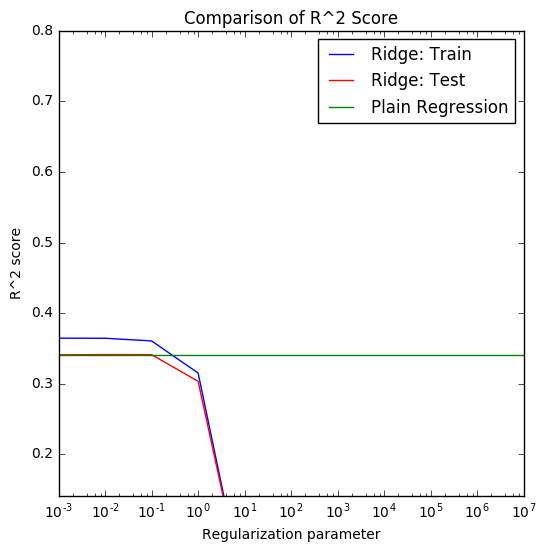

In [29]:
# tune regularizaiton parameters

# Store test R-squared for different regression parameters
max_pow_of_10 = 7 # maximum power of 10
min_pow_of_10 = -3 # minimum power of 10
num_params = max_pow_of_10 - min_pow_of_10 + 1

train_r_squared = []
test_r_squared = []

#standardize x_train and y_train
std = Standardize(with_mean=False)
x_train_std = std.fit_transform(X_train.values)
x_test_std = X_test.values / std.scale_ 

for i in range(min_pow_of_10, max_pow_of_10 + 1):    
    # Fit ridge regression on train set
    reg = Lasso_Reg(alpha = 10**i)
    reg.fit(x_train_std, y_train)
        
    # Evaluate train & test performance
    train_r_squared.append(reg.score(x_train_std, y_train))
    test_r_squared.append(reg.score(x_test_std, y_test))
    
# Plot train an test R-squared as a function parameter value
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.semilogx(10.0**np.arange(min_pow_of_10, max_pow_of_10 + 1), 
            train_r_squared, 
            c='b', 
            label='Ridge: Train')
ax.semilogx(10.0**np.arange(min_pow_of_10, max_pow_of_10 + 1), 
            test_r_squared, 
            c='r', 
            label='Ridge: Test')
ax.axhline(y=test_r_squared_plain, 
           c='g', 
           label='Plain Regression')

ax.set_xlabel('Regularization parameter')
ax.set_ylabel('R^2 score')
ax.set_ylim((test_r_squared_plain - 0.2, 0.8))
ax.set_title('Comparison of R^2 Score')
ax.legend(loc='best')

print 'Lasso Regression: max R^2 score on training set', max(train_r_squared)
print 'Lasso Regression: max R^2 score on test set', max(test_r_squared)

plt.show()

(-8.5020046736900987,
 -5.5020046736900987,
 89.135102088238256,
 178.91238793408289)

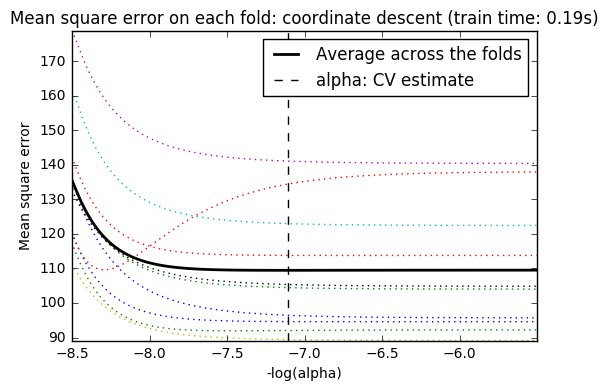

In [30]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets
import time

# Compute paths
t1 = time.time()
model = LassoCV(cv=10).fit(X_train, y_train)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)
plt.figure()

# ymin, ymax = 21000, 29000
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
# plt.ylim(ymin, ymax)

In [31]:
# Ridge regression: Fit and evaluate 
reg = Ridge_Reg(alpha = 100)
reg.fit(x_std, y)
coefficients = reg.coef_

print 'Ridge:'
print 'Coefficients:', coefficients
print 'Predictors with non-zero coefficients:', [i for i, item in enumerate(coefficients) if abs(item) > 0]

Ridge:
Coefficients: [ -2.07665199e-01   3.21243374e-01  -1.56675365e-01  -7.68757640e-02
   1.15886583e+00  -1.68626542e-01   1.76397079e+00  -2.59801730e-01
  -1.16868335e+00  -4.00690625e-01  -6.17256746e-01  -3.69101525e-02
  -2.49376412e-01   5.40575472e-01  -4.08831715e-01  -6.49069414e-01
  -1.97084987e-01  -1.68626542e-01  -3.67008456e-01  -2.16347444e-01
   1.12955279e+00   3.14974685e+00   1.68319785e-01  -1.50783103e-01
  -6.27553120e-02   3.27417522e-01  -1.56752897e-01   3.85450574e-01
   5.76958295e-03  -1.45861685e-01  -2.91891853e-01  -3.22468923e-04
  -1.02435445e-01   3.43664653e-01  -1.57759259e-01   1.99583107e-01
   5.82789905e-01  -4.11513701e+00  -1.96426252e+00   7.62667123e-01]
Predictors with non-zero coefficients: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


Ridge Regression: max R^2 score on test set 0.364444303703
Ridge Regression: max R^2 score on test set 0.342346893815


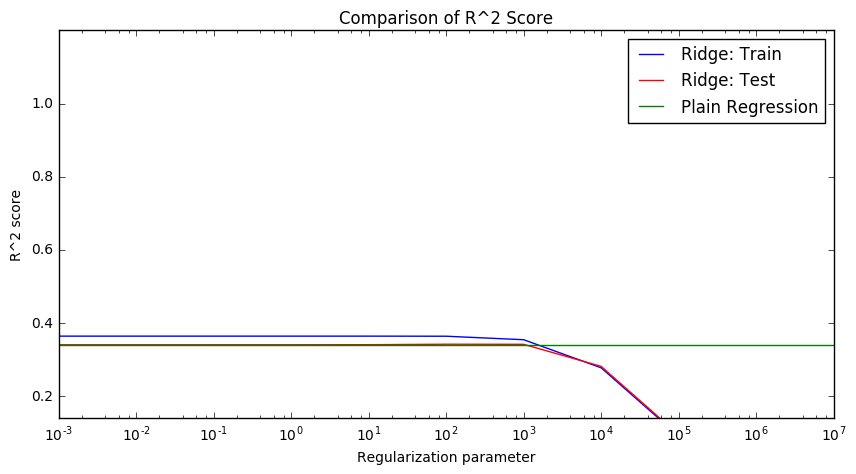

In [32]:
# tune regularizaiton parameters

# Store test R-squared for different regression parameters
max_pow_of_10 = 7 # maximum power of 10
min_pow_of_10 = -3 # minimum power of 10
num_params = max_pow_of_10 - min_pow_of_10 + 1

train_r_squared = []
test_r_squared = []

#standardize x_train and y_train
std = Standardize(with_mean=False)
x_train_std = std.fit_transform(X_train.values)
x_test_std = X_test.values / std.scale_ 

for i in range(min_pow_of_10, max_pow_of_10 + 1):    
    # Fit ridge regression on train set
    reg = Ridge_Reg(alpha = 10**i)
    reg.fit(x_train_std, y_train)
        
    # Evaluate train & test performance
    train_r_squared.append(reg.score(x_train_std, y_train))
    test_r_squared.append(reg.score(x_test_std, y_test))
    
# Plot train an test R-squared as a function parameter value
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.semilogx(10.0**np.arange(min_pow_of_10, max_pow_of_10 + 1), 
            train_r_squared, 
            c='b', 
            label='Ridge: Train')
ax.semilogx(10.0**np.arange(min_pow_of_10, max_pow_of_10 + 1), 
            test_r_squared, 
            c='r', 
            label='Ridge: Test')
ax.axhline(y=test_r_squared_plain, 
           c='g', 
           label='Plain Regression')

ax.set_xlabel('Regularization parameter')
ax.set_ylabel('R^2 score')
ax.set_ylim((test_r_squared_plain - 0.2, 1.2))
ax.set_title('Comparison of R^2 Score')
ax.legend(loc='best')

print 'Ridge Regression: max R^2 score on test set', max(train_r_squared)
print 'Ridge Regression: max R^2 score on test set', max(test_r_squared)

plt.show()



The overall R2 of the rentrice dataset is 0.499, which is smaller than that of housing price. This means that the built environment and details are more associated with the housingprice rather than rentprice. 


Ridge regression: Test R^2 score for CV choice 0.342346893815
Ridge regression: Max Test R^2 score 0.342346893815
Plain regression: Test R^2 score: 0.340867140823


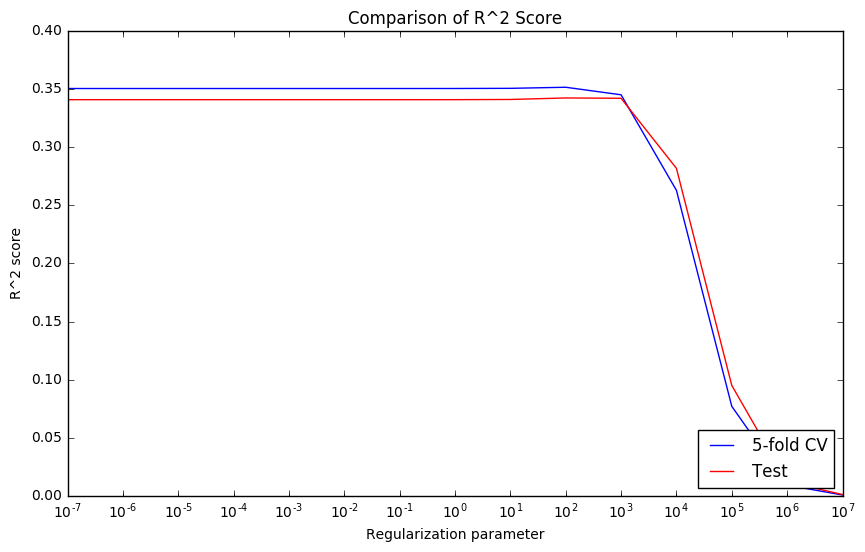

In [33]:
#--------  k_fold_r_squared
# A function for k-fold cross validation with Ridge regression
# Input: 
#      x_train (n x d array of predictors in training data)
#      y_train (n x 1 array of response variable vals in training data)
#      num_folds (no. of folds for CV)
#      param_val (regularization parameter value)
# Return: 
#      average R^2 value across folds

def k_fold_r_squared(x_train, y_train, num_folds, param_val):
    n_train = x_train.shape[0]
    n = int(np.round(n_train * 1. / num_folds)) # points per fold

    # Iterate over folds
    cv_r_squared = 0
    
    for fold in range(1, num_folds + 1):
        # Take k-1 folds for training 
        x_first_half = x_train[:n * (fold - 1), :]
        x_second_half = x_train[n * fold + 1:, :]
        x_train_cv = np.concatenate((x_first_half, x_second_half), axis=0)
        
        y_first_half = y_train[:n * (fold - 1)]
        y_second_half = y_train[n * fold + 1:]
        y_train_cv = np.concatenate((y_first_half, y_second_half), axis=0)
        
        # Take the middle fold for testing
        x_test_cv = x_train[1 + n * (fold - 1):n * fold, :]
        y_test_cv = y_train[1 + n * (fold - 1):n * fold]

        # Fit ridge regression model with parameter value on CV train set, and evaluate CV test performance
        reg = Ridge_Reg(alpha = param_val)
        reg.fit(x_train_cv, y_train_cv)
        r_squared = reg.score(x_test_cv, y_test_cv)
    
        # Cummulative R^2 value across folds
        cv_r_squared += r_squared

    # Return average R^2 value across folds
    return cv_r_squared * 1.0 / num_folds

# Store test & CV R^2 values for different regression parameter values
# Range: 10^-7, ... 10^7
max_pow_of_10 = 7
min_pow_of_10 = -7
num_params = max_pow_of_10 - min_pow_of_10 + 1

test_r_squared = []
cv_r_squared = []

# Iterate over various parameter values
for power_of_10 in range(min_pow_of_10, max_pow_of_10+1):
    
    #standardize x_train and y_train
    std = Standardize(with_mean=False)
    x_train_std = std.fit_transform(X_train)
    x_test_std = X_test / std.scale_ 
    
    # Fit regression model on train set, and evaluate test R^2
    reg = Ridge_Reg(alpha=10**power_of_10)
    reg.fit(x_train_std, y_train)
    test_r_squared.append(reg.score(x_test_std, y_test))
    
    # Evaluate 5-fold CV R^2
    cv_r_squared.append(k_fold_r_squared(x_train_std, y_train, 5, 10**power_of_10))

# Plot CV and test R^2 values as a function of parameter value
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.semilogx(10.0**np.arange(min_pow_of_10, max_pow_of_10 + 1), 
            cv_r_squared, 
            c='b', 
            label='5-fold CV')
ax.semilogx(10.0**np.arange(min_pow_of_10, max_pow_of_10 + 1), 
            test_r_squared, 
            c='r', 
            label='Test')

ax.set_xlabel('Regularization parameter')
ax.set_ylabel('R^2 score')
ax.set_title('Comparison of R^2 Score')
ax.legend(loc='lower right')

# Best CV parameter value
best_cv_param = np.argmax(cv_r_squared)

# Print R^2 for best CV parameter, max R^2 across all parameters, and R^2 for plain regression
print 'Ridge regression: Test R^2 score for CV choice', test_r_squared[best_cv_param]
print 'Ridge regression: Max Test R^2 score', max(test_r_squared)
print 'Plain regression: Test R^2 score:', test_r_squared_plain

plt.show()


In [34]:
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
from IPython.display import Image
import pydotplus



from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn import tree

C:\Users\EllieHan\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

max_depth = 10
regr_rf = RandomForestRegressor(n_estimators=13, criterion='mse', max_depth=30,min_samples_leaf=1, 
min_weight_fraction_leaf=0.0, max_features=5, max_leaf_nodes=None, bootstrap=True, 
oob_score=False, n_jobs=1, random_state=2, verbose=0, warm_start=True)
regr_rf.fit(X_train, y_train)
y_rf = regr_rf.predict(X_test)
score1 = regr_rf.score(X_train, y_train)
score2 = regr_rf.score(X_test,y_test)
path = regr_rf.decision_path(X_test)

print score1,score2

In [45]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

max_depth = 10
regr_rf = RandomForestRegressor(n_estimators=13, criterion='mse', max_depth=30,min_samples_leaf=1, 
min_weight_fraction_leaf=0.0, max_features=5, max_leaf_nodes=None, bootstrap=True, 
oob_score=False, n_jobs=1, random_state=2, verbose=0, warm_start=True)
regr_rf.fit(X_train, y_train)
y_rf = regr_rf.predict(X_test)
# print regr_rf.estimators_

score1 = regr_rf.score(X_train, y_train)
score2 = regr_rf.score(X_test,y_test)
path = regr_rf.decision_path(X_test)

print score1,score2

0.921519441518 0.663857567272


In [36]:
# COLOR STUFF 
from matplotlib.colors import ListedColormap
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [46]:
#--------  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (classifier)
#      poly_flag (fits quadratic model if true, otherwise linear)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 1), poly_flag=False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='green')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='white')
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax

In [50]:
plot_decision_boundary(X_train.as_matrix, y_train.as_matrix, regr_rf, "title", ax, bounds=(0, 1), poly_flag=False)

TypeError: 'instancemethod' object has no attribute '__getitem__'